# گزارش نهایی

In [1]:
from IPython.display import clear_output
import numpy as np
import wumpus_world as ww
import matplotlib.pyplot as plt

In [2]:
def debug(data):
    print(data)
    clear_output(wait=True)

## Generating a test map

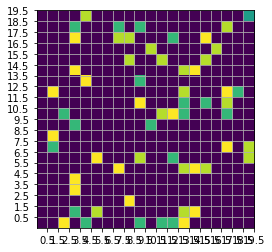

In [291]:
agent = ww.agent(20, 20, 20, 20, 20)
agent.plot_map()

## on_policy_MC_control

In [304]:
Q, N, g_log = agent.on_policy_MC_control(1)
Q = Q*0

In [305]:
epsilon = 0.1
gamma = 0.9

num_run_per_episode = 100
G_log = np.zeros(0)
step_log = np.zeros(0)

num_episodes = 1000
for i in range(num_episodes):
    debug(float(i/num_episodes))
    
    Q, N, g_log = agent.on_policy_MC_control(5, Q=Q, N=N, epsilon=epsilon, gamma=gamma)
    avg_step = 0
    avg_G = 0
    
    for _ in range(num_run_per_episode):
        step = 0
        G = 0
        # first state (random)
        s = (0, 0, 0)
        # a log list for episode
        episode = list()
        
        while True:
            a = agent.epsilon_greedy(Q, s, agent.num_action, epsilon)
            step = step +1
            s, r = agent.deterministic_move(s[:-1], a)
            G = r + 0.9 * G
            episode.append(s + ( a, r))
            if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
                break
                
        avg_step = avg_step + step / num_run_per_episode
        avg_G = avg_G + G / num_run_per_episode
        
    G_log = np.append(G_log, avg_G)
    step_log = np.append(step_log, avg_step)
    
G_log_on_MC = G_log
step_log_on_MC = step_log

0.999


Text(0.5, 1.0, 'A sample path by ON policy MC')

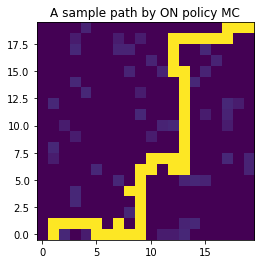

In [306]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q, s, agent.num_action, 0.1)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break
        
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
plt.title('A sample path by ON policy MC')
# agent.plot_map()

## sarsa_control

In [307]:
Q, g_log = agent.sarsa_control(1)
Q = Q*0

In [308]:
epsilon = 0.1
gamma = 0.9
alpha=0.2

num_run_per_episode = 100
G_log = np.zeros(0)
step_log = np.zeros(0)

num_episodes = 1000
for i in range(num_episodes):
    debug(float(i/num_episodes))
    Q, g_log  = agent.sarsa_control(5, Q=Q, gamma=gamma, alpha=alpha, epsilon=epsilon)
    avg_step = 0
    avg_G = 0
    
    for _ in range(num_run_per_episode):
        step = 0
        G = 0
        # first state (random)
        s = (0, 0, 0)
        # a log list for episode
        episode = list()
        
        while True:
            a = agent.epsilon_greedy(Q, s, agent.num_action, epsilon)
            step = step +1
            s, r = agent.deterministic_move(s[:-1], a)
            G = r + 0.9 * G
            episode.append(s + ( a, r))
            if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
                break
        avg_step = avg_step + step/num_run_per_episode
        avg_G = avg_G + G/num_run_per_episode
        
    G_log = np.append(G_log, avg_G)
    step_log = np.append(step_log, avg_step)
    
G_log_sarsa = G_log
step_log_sarsa = step_log

0.999


Text(0.5, 1.0, 'A sample path by SARSA')

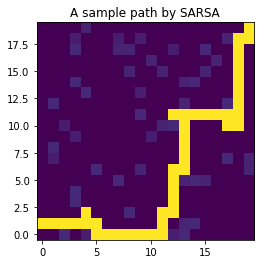

In [309]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q, s, agent.num_action, 0.1)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break
        
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
plt.title('A sample path by SARSA')
# agent.plot_map()

## Q_learning_control

In [310]:
Q, g_log = agent.Q_learning_control(1)
Q = Q*0

In [311]:
epsilon = 0.1
gamma = 0.9
alpha=0.2

num_run_per_episode = 100
G_log = np.zeros(0)
step_log = np.zeros(0)

num_episodes = 1000
for i in range(num_episodes):
    debug(float(i/num_episodes))
    Q, g_log  = agent.Q_learning_control(5, Q=Q, gamma=gamma, alpha=alpha, epsilon=epsilon)
    avg_step = 0
    avg_G = 0
    
    for _ in range(num_run_per_episode):
        step = 0
        G = 0
        # first state (random)
        s = (0, 0, 0)
        # a log list for episode
        episode = list()
        
        while True:
            a = agent.epsilon_greedy(Q, s, agent.num_action, epsilon)
            step = step +1
            s, r = agent.deterministic_move(s[:-1], a)
            G = r + 0.9 * G
            episode.append(s + ( a, r))
            if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
                break
        avg_step = avg_step + step/num_run_per_episode
        avg_G = avg_G + G/num_run_per_episode
        
    G_log = np.append(G_log, avg_G)
    step_log = np.append(step_log, avg_step)
    
G_log_q_learning = G_log
step_log_q_learning = step_log

0.999


Text(0.5, 1.0, 'A sample path by Q-Learning')

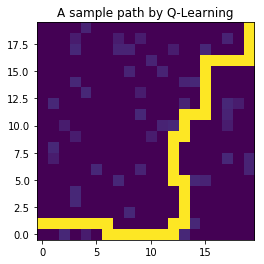

In [312]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q, s, agent.num_action, 0.1)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break
        
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
plt.title('A sample path by Q-Learning')
# agent.plot_map()

## Comparison in average return during learning

Text(0.5, 1.0, 'Average of return over 100 run after each 5 episodes of learning')

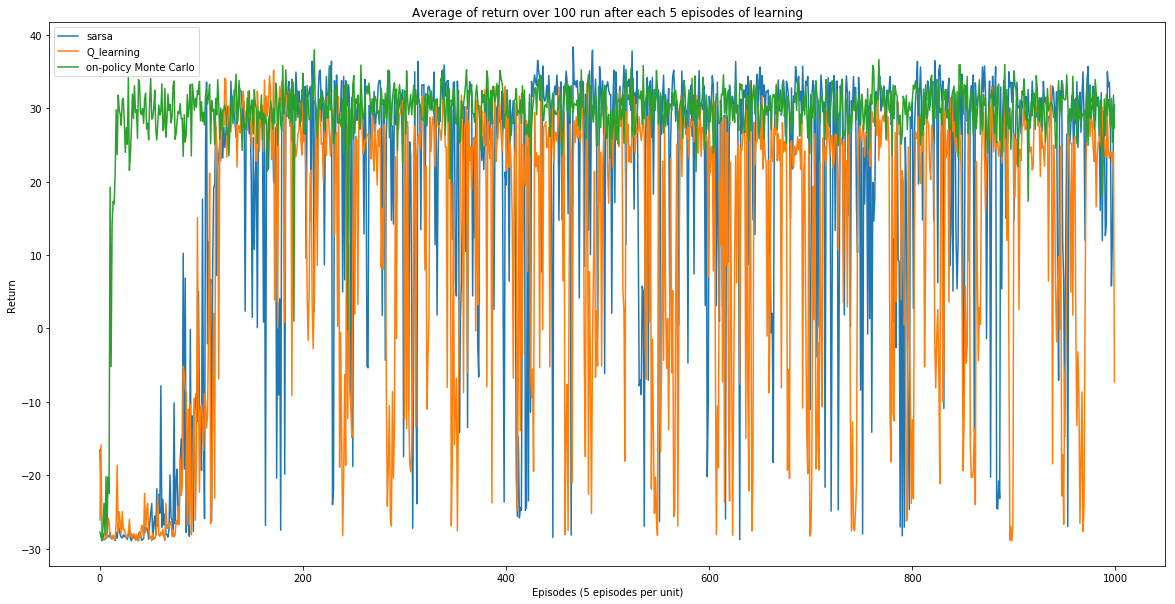

In [321]:
plt.figure(figsize=(20,10))
plt.plot(G_log_sarsa, label = 'sarsa')
plt.plot(G_log_q_learning, label= 'Q_learning')
plt.plot(G_log_on_MC, label= 'on-policy Monte Carlo')
# plt.ylim((-200,200))
plt.legend()
plt.xlabel('Episodes (5 episodes per unit)')
plt.ylabel('Return')
plt.title('Average of return over 100 run after each 5 episodes of learning')

## Comparison in average nemer of steps per episode during learning

Text(0.5, 1.0, 'Average of steps per episode over 100 run after each 5 episodes of learning')

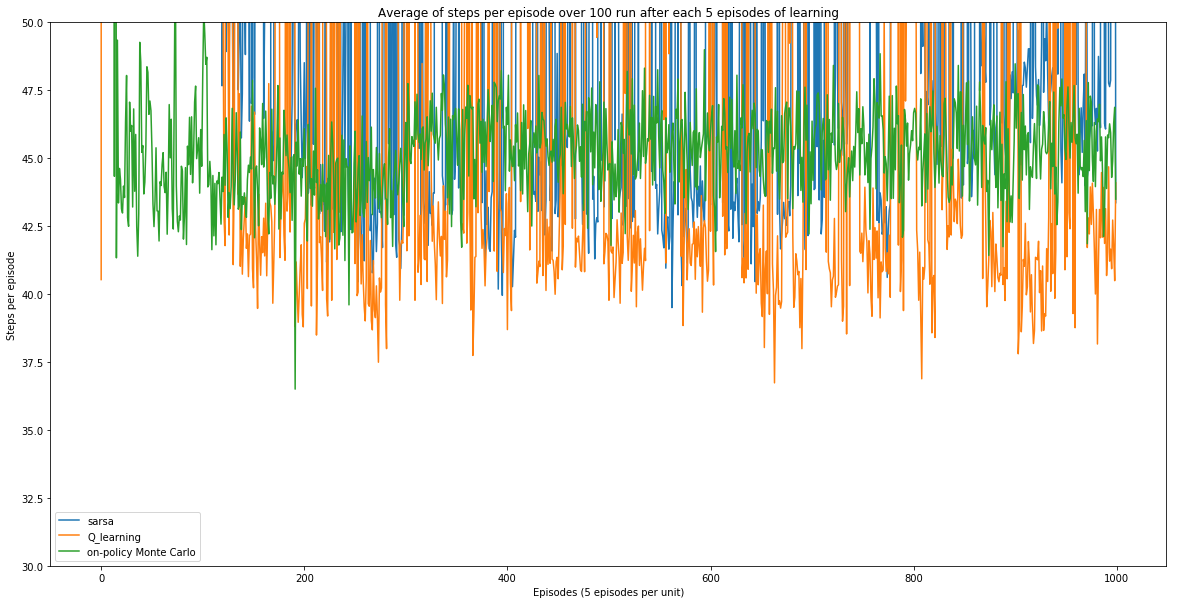

In [319]:
plt.figure(figsize=(20,10))
plt.plot(step_log_sarsa, label = 'sarsa')
plt.plot(step_log_q_learning, label= 'Q_learning')
plt.plot(step_log_on_MC, label= 'on-policy Monte Carlo')
plt.ylim((30,60))
plt.legend()
plt.xlabel('Episodes (5 episodes per unit)')
plt.ylabel('Steps per episode')
plt.title('Average of steps per episode over 100 run after each 5 episodes of learning')